In [3]:
# code by Jinshun Lin
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/kaggle_fake_train.csv')

# Exploring the dataset

In [5]:
df.shape

(20800, 5)

In [6]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [7]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
# Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [9]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

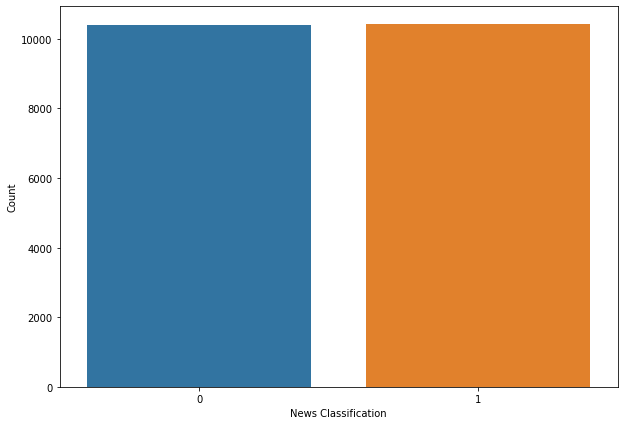

In [11]:
# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

# Data cleaning and preprocessing

In [12]:
print(df.shape)

(20800, 4)


In [13]:
# Finding any NaN values
df.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [14]:
# dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [15]:
news = df.copy()

In [16]:
news.reset_index(inplace=True)

In [17]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
# cleaning the news
corpus = []
ps = PorterStemmer()
for i in range(0,news.shape[0]):
    # cleaninggg special character from the news title
    title = re.sub(pattern='[^a-zA-Z]',repl=' ', string=news.title[i])

    # converting the entire news title to lower case
    title = title.lower()

    #tokenizinggg the news title by words
    words = title.split()

    #removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]

    # stemming the words
    words = [ps.stem(word) for word in words]

    # joining the stemmed words
    title = ' '.join(words)

    # building a corpus of news title
    corpus.append(title)

In [19]:
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [24]:
# creatin the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [26]:
X.shape
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
# extracting dependent variable from the dataset
y = news['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)



In [31]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [32]:
nb_y_pred = nb_classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test,nb_y_pred)
score3 = recall_score(y_test,nb_y_pred)
print('====scores====')
print('accuracy score is: {}%'.format(round(score1*100,2)))
print('precision score is: {}'.format(round(score2,2)))
print('recall score is: {}'.format(round(score3,2)))

====scores====
accuracy score is: 90.16%
precision score is: 0.87
recall score is: 0.91


In [36]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [37]:
nb_cm

array([[1823,  217],
       [ 143, 1474]])

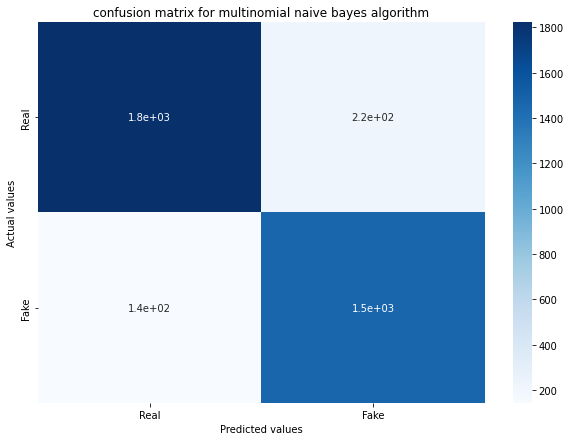

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap='Blues', xticklabels=['Real','Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for multinomial naive bayes algorithm')
plt.show()

In [39]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1, 1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i
print("===========================")
print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 90.51%
Accuracy score for alpha=0.2 is: 90.51%
Accuracy score for alpha=0.3 is: 90.59%
Accuracy score for alpha=0.4 is: 90.51%
Accuracy score for alpha=0.5 is: 90.43%
Accuracy score for alpha=0.6 is: 90.37%
Accuracy score for alpha=0.7 is: 90.27%
Accuracy score for alpha=0.8 is: 90.21%
Accuracy score for alpha=0.9 is: 90.16%
Accuracy score for alpha=1.0 is: 90.16%
The best accuracy is 90.59% with alpha value as 0.3


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [41]:
# Predicting the Test set results
lr_y_pred = lr_classifier.predict(X_test)

In [42]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("=============================scores========================")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

=============================scores========================
Accuracy score is: 93.52%
Precision score is: 0.89
Recall score is: 0.97


In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [45]:
lr_cm

array([[1850,  190],
       [  47, 1570]])

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Algorithm')

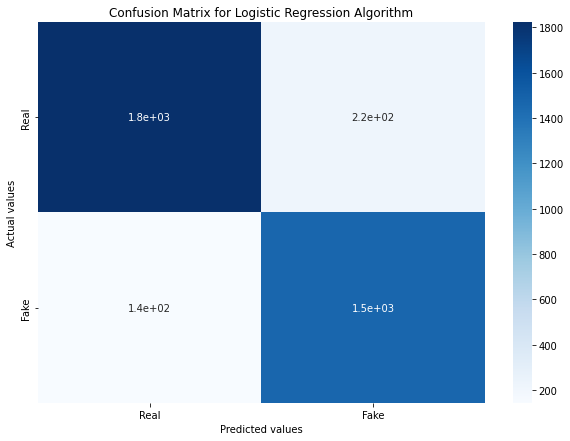

In [46]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(data=nb_cm,annot=True, cmap="Blues", xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')

In [47]:
# Hyperparameter tuning the Logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = LogisticRegression(C=i,random_state=0)
    temp_classifier.fit(X_train,y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for C={} is: {}%".format(round(i,1),round(score*100,2)))
    if score > best_accuracy:
        best_accuracy = score
        c_val = i
print("===============================================")
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100,2),round(c_val,1)))

Accuracy score for C=0.1 is: 92.02%
Accuracy score for C=0.2 is: 92.86%
Accuracy score for C=0.3 is: 93.22%
Accuracy score for C=0.4 is: 93.38%
Accuracy score for C=0.5 is: 93.49%
Accuracy score for C=0.6 is: 93.49%
Accuracy score for C=0.7 is: 93.55%
Accuracy score for C=0.8 is: 93.63%
Accuracy score for C=0.9 is: 93.57%
Accuracy score for C=1.0 is: 93.52%
The best accuracy is 93.63% with C value as 0.8


In [48]:
classifier = LogisticRegression(C=0.8,random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.8, random_state=0)

# Predictions

In [49]:
def fake_news(sample_news):
    sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
    sample_news = sample_news.lower()
    sample_news_words = sample_news.split()
    sample_news_words = [w for w in sample_news_words if not w in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_news = [ps.stem(w) for w in sample_news_words]
    final_news = ' '.join(final_news)

    temp = cv.transform([final_news]).toarray()
    return classifier.predict(temp)

In [50]:
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/kaggle_fake_test.csv')

In [51]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [52]:
news_title = df_test['title']
news_title.shape

(5200,)

In [53]:
from random import randint

In [55]:
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]
print('News: {}'.format(sample_news))
if fake_news(sample_news):
    print('Prediction: This is a FAKE news!')
else:
    print('Prediction: This is a REAL news.')


News: Halt-HALT (Halt Hillary-Above-the-Law-Treatment)
Prediction: This is a FAKE news!


In [56]:
row = randint(0, news_title.shape[0]-1)
sample_news = news_title[row]
print('News: {}'.format(sample_news))
if fake_news(sample_news):
    print('Prediction: This is a FAKE news!')
else:
    print('Prediction: This is a REAL news.')

News: If You Like the Arts, Save the N.E.A., Advocates Tell Lawmakers - The New York Times
Prediction: This is a REAL news.


In [57]:
row = randint(0,news_title.shape[0]-1)
smaple_news = news_title[row]
print('News: {}'.format(sample_news))
if fake_news(sample_news):
    print('Prediction: This is a FAKE news!')
else:
    print('Prediction: This is a REAL news.')

News: If You Like the Arts, Save the N.E.A., Advocates Tell Lawmakers - The New York Times
Prediction: This is a REAL news.


In [58]:
row = randint(0,news_title.shape[0]-1)
smaple_news = news_title[row]
print('News: {}'.format(sample_news))
if fake_news(sample_news):
    print('Prediction: This is a FAKE news!')
else:
    print('Prediction: This is a REAL news.')

News: If You Like the Arts, Save the N.E.A., Advocates Tell Lawmakers - The New York Times
Prediction: This is a REAL news.
